<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Beds_Occupancy_LSTM_TS_exp_4_500_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [2]:
df = pd.read_csv('/content/beds_occupied.csv')
df

,date,occupied
0,11/05/2022 0:00,0.79
1,11/05/2022 1:00,0.79
2,11/05/2022 2:00,0.80
3,11/05/2022 3:00,0.80
4,11/05/2022 4:00,0.80
...,...,...
1995,02/08/2022 3:00,0.81
1996,02/08/2022 4:00,0.82
1997,02/08/2022 5:00,0.82
1998,02/08/2022 6:00,0.82


In [3]:
df.index = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df[:26]

,date,occupied
date,,
2022-05-11 00:00:00,11/05/2022 0:00,0.79
2022-05-11 01:00:00,11/05/2022 1:00,0.79
2022-05-11 02:00:00,11/05/2022 2:00,0.80
2022-05-11 03:00:00,11/05/2022 3:00,0.80
2022-05-11 04:00:00,11/05/2022 4:00,0.80
2022-05-11 05:00:00,11/05/2022 5:00,0.80
2022-05-11 06:00:00,11/05/2022 6:00,0.81
2022-05-11 07:00:00,11/05/2022 7:00,0.81
2022-05-11 08:00:00,11/05/2022 8:00,0.81


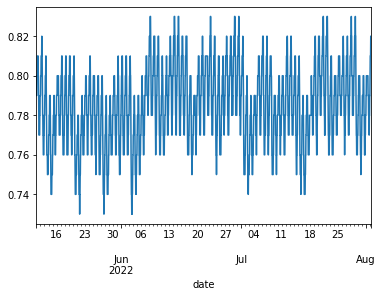

In [4]:
bed = df['occupied']
bed.plot()

In [5]:
def df_to_X_y(df, window_size=30):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [6]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bed, WINDOW_SIZE)
X1.shape, y1.shape

((1995, 5, 1), (1995,))

In [7]:
X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1750], y1[1500:1750]
X_test1, y_test1 = X1[1750:], y1[1750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 5, 1), (1500,), (250, 5, 1), (250,), (245, 5, 1), (245,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=500, callbacks=[cp1])

Epoch 1/500
43/47 [==========================>...] - ETA: 0s - loss: 0.4953 - root_mean_squared_error: 0.7038

47/47 [==============================] - 9s 141ms/step - loss: 0.4761 - root_mean_squared_error: 0.6900 - val_loss: 0.2168 - val_root_mean_squared_error: 0.4657
Epoch 2/500
47/47 [==============================] - ETA: 0s - loss: 0.0323 - root_mean_squared_error: 0.1797

47/47 [==============================] - 5s 112ms/step - loss: 0.0323 - root_mean_squared_error: 0.1797 - val_loss: 5.0605e-04 - val_root_mean_squared_error: 0.0225
Epoch 3/500
44/47 [===========================>..] - ETA: 0s - loss: 3.8126e-04 - root_mean_squared_error: 0.0195

47/47 [==============================] - 5s 112ms/step - loss: 3.7568e-04 - root_mean_squared_error: 0.0194 - val_loss: 2.5919e-04 - val_root_mean_squared_error: 0.0161
Epoch 4/500
39/47 [=======================>......] - ETA: 0s - loss: 2.3564e-04 - root_mean_squared_error: 0.0154

47/47 [==============================] - 5s 105ms/step - loss: 2.3648e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.5022e-04 - val_root_mean_squared_error: 0.0158
Epoch 5/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3268e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.5433e-04 - val_root_mean_squared_error: 0.0159
Epoch 6/500
40/47 [========================>.....] - ETA: 0s - loss: 2.2723e-04 - root_mean_squared_error: 0.0151

47/47 [==============================] - 5s 116ms/step - loss: 2.2992e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4515e-04 - val_root_mean_squared_error: 0.0157
Epoch 7/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3128e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.6560e-04 - val_root_mean_squared_error: 0.0163
Epoch 8/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3199e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4700e-04 - val_root_mean_squared_error: 0.0157
Epoch 9/500
47/47 [==============================] - 0s 7ms/step - loss: 2.3369e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.6794e-04 - val_root_mean_squared_error: 0.0164
Epoch 10/500
47/47 [==============================] - 0s 7ms/step - loss: 2.3907e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.5769e-04 - val_root_mean_squared_error: 0.0161
Epoch 11/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3568e-04 - root_mean_squared_error: 0.

47/47 [==============================] - 5s 102ms/step - loss: 2.3541e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.4425e-04 - val_root_mean_squared_error: 0.0156
Epoch 13/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2932e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.5230e-04 - val_root_mean_squared_error: 0.0159
Epoch 14/500
47/47 [==============================] - 0s 7ms/step - loss: 2.3153e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4502e-04 - val_root_mean_squared_error: 0.0157
Epoch 15/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3168e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.6018e-04 - val_root_mean_squared_error: 0.0161
Epoch 16/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3421e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.4649e-04 - val_root_mean_squared_error: 0.0157
Epoch 17/500
39/47 [=======================>......] - ETA: 0s - loss: 2.3418e-04 - root_mean_squared_error: 0.0

47/47 [==============================] - 6s 131ms/step - loss: 2.2979e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4323e-04 - val_root_mean_squared_error: 0.0156
Epoch 18/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2997e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.5068e-04 - val_root_mean_squared_error: 0.0158
Epoch 19/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3026e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4471e-04 - val_root_mean_squared_error: 0.0156
Epoch 20/500
42/47 [=========================>....] - ETA: 0s - loss: 2.3135e-04 - root_mean_squared_error: 0.0152

47/47 [==============================] - 5s 112ms/step - loss: 2.2930e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.4272e-04 - val_root_mean_squared_error: 0.0156
Epoch 21/500
42/47 [=========================>....] - ETA: 0s - loss: 2.2915e-04 - root_mean_squared_error: 0.0151

47/47 [==============================] - 5s 105ms/step - loss: 2.3174e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4257e-04 - val_root_mean_squared_error: 0.0156
Epoch 22/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2980e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4295e-04 - val_root_mean_squared_error: 0.0156
Epoch 23/500
42/47 [=========================>....] - ETA: 0s - loss: 2.2934e-04 - root_mean_squared_error: 0.0151

47/47 [==============================] - 6s 124ms/step - loss: 2.3194e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4239e-04 - val_root_mean_squared_error: 0.0156
Epoch 24/500
40/47 [========================>.....] - ETA: 0s - loss: 2.2873e-04 - root_mean_squared_error: 0.0151

47/47 [==============================] - 5s 112ms/step - loss: 2.2920e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.4190e-04 - val_root_mean_squared_error: 0.0156
Epoch 25/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3112e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4894e-04 - val_root_mean_squared_error: 0.0158
Epoch 26/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3165e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4767e-04 - val_root_mean_squared_error: 0.0157
Epoch 27/500
43/47 [==========================>...] - ETA: 0s - loss: 2.3165e-04 - root_mean_squared_error: 0.0152

47/47 [==============================] - 5s 105ms/step - loss: 2.2833e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.4158e-04 - val_root_mean_squared_error: 0.0155
Epoch 28/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2825e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.6702e-04 - val_root_mean_squared_error: 0.0163
Epoch 29/500
43/47 [==========================>...] - ETA: 0s - loss: 2.3367e-04 - root_mean_squared_error: 0.0153

47/47 [==============================] - 5s 115ms/step - loss: 2.3388e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.4128e-04 - val_root_mean_squared_error: 0.0155
Epoch 30/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3556e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.4822e-04 - val_root_mean_squared_error: 0.0158
Epoch 31/500
47/47 [==============================] - 0s 6ms/step - loss: 2.4102e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.5143e-04 - val_root_mean_squared_error: 0.0159
Epoch 32/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3543e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.8750e-04 - val_root_mean_squared_error: 0.0170
Epoch 33/500
43/47 [==========================>...] - ETA: 0s - loss: 2.5135e-04 - root_mean_squared_error: 0.0159

47/47 [==============================] - 5s 112ms/step - loss: 2.4732e-04 - root_mean_squared_error: 0.0157 - val_loss: 2.4079e-04 - val_root_mean_squared_error: 0.0155
Epoch 34/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3680e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.4430e-04 - val_root_mean_squared_error: 0.0156
Epoch 35/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3262e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.4620e-04 - val_root_mean_squared_error: 0.0157
Epoch 36/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3050e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.5754e-04 - val_root_mean_squared_error: 0.0160
Epoch 37/500
47/47 [==============================] - 0s 6ms/step - loss: 2.4429e-04 - root_mean_squared_error: 0.0156 - val_loss: 2.5519e-04 - val_root_mean_squared_error: 0.0160
Epoch 38/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3540e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 105ms/step - loss: 2.3056e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.3864e-04 - val_root_mean_squared_error: 0.0154
Epoch 40/500
47/47 [==============================] - 0s 7ms/step - loss: 2.2781e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.3940e-04 - val_root_mean_squared_error: 0.0155
Epoch 41/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2646e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.3907e-04 - val_root_mean_squared_error: 0.0155
Epoch 42/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2458e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.4466e-04 - val_root_mean_squared_error: 0.0156
Epoch 43/500
41/47 [=========================>....] - ETA: 0s - loss: 2.4248e-04 - root_mean_squared_error: 0.0156

47/47 [==============================] - 5s 116ms/step - loss: 2.3833e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.3680e-04 - val_root_mean_squared_error: 0.0154
Epoch 44/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3457e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.3680e-04 - val_root_mean_squared_error: 0.0154
Epoch 45/500
43/47 [==========================>...] - ETA: 0s - loss: 2.3434e-04 - root_mean_squared_error: 0.0153

47/47 [==============================] - 5s 104ms/step - loss: 2.3216e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.3607e-04 - val_root_mean_squared_error: 0.0154
Epoch 46/500
47/47 [==============================] - 0s 7ms/step - loss: 2.2812e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.6061e-04 - val_root_mean_squared_error: 0.0161
Epoch 47/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3112e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.4302e-04 - val_root_mean_squared_error: 0.0156
Epoch 48/500
41/47 [=========================>....] - ETA: 0s - loss: 2.2846e-04 - root_mean_squared_error: 0.0151

47/47 [==============================] - 5s 113ms/step - loss: 2.3017e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.3509e-04 - val_root_mean_squared_error: 0.0153
Epoch 49/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3337e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.3762e-04 - val_root_mean_squared_error: 0.0154
Epoch 50/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2875e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.4441e-04 - val_root_mean_squared_error: 0.0156
Epoch 51/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3268e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.3674e-04 - val_root_mean_squared_error: 0.0154
Epoch 52/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3510e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.3566e-04 - val_root_mean_squared_error: 0.0154
Epoch 53/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2548e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 112ms/step - loss: 2.2437e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.3281e-04 - val_root_mean_squared_error: 0.0153
Epoch 56/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3863e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.3490e-04 - val_root_mean_squared_error: 0.0153
Epoch 57/500
41/47 [=========================>....] - ETA: 0s - loss: 2.3474e-04 - root_mean_squared_error: 0.0153

47/47 [==============================] - 5s 105ms/step - loss: 2.3571e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.3198e-04 - val_root_mean_squared_error: 0.0152
Epoch 58/500
47/47 [==============================] - 0s 6ms/step - loss: 2.4907e-04 - root_mean_squared_error: 0.0158 - val_loss: 3.3055e-04 - val_root_mean_squared_error: 0.0182
Epoch 59/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3942e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.4273e-04 - val_root_mean_squared_error: 0.0156
Epoch 60/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2539e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.3332e-04 - val_root_mean_squared_error: 0.0153
Epoch 61/500
41/47 [=========================>....] - ETA: 0s - loss: 2.3469e-04 - root_mean_squared_error: 0.0153

47/47 [==============================] - 5s 119ms/step - loss: 2.2968e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.3121e-04 - val_root_mean_squared_error: 0.0152
Epoch 62/500
41/47 [=========================>....] - ETA: 0s - loss: 2.2357e-04 - root_mean_squared_error: 0.0150

47/47 [==============================] - 6s 128ms/step - loss: 2.2329e-04 - root_mean_squared_error: 0.0149 - val_loss: 2.2943e-04 - val_root_mean_squared_error: 0.0151
Epoch 63/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2477e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.2947e-04 - val_root_mean_squared_error: 0.0151
Epoch 64/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2690e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.3209e-04 - val_root_mean_squared_error: 0.0152
Epoch 65/500
45/47 [===========================>..] - ETA: 0s - loss: 2.1794e-04 - root_mean_squared_error: 0.0148

47/47 [==============================] - 5s 105ms/step - loss: 2.1785e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.2864e-04 - val_root_mean_squared_error: 0.0151
Epoch 66/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1761e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.4176e-04 - val_root_mean_squared_error: 0.0155
Epoch 67/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2761e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.6542e-04 - val_root_mean_squared_error: 0.0163
Epoch 68/500
41/47 [=========================>....] - ETA: 0s - loss: 2.2896e-04 - root_mean_squared_error: 0.0151

47/47 [==============================] - 5s 114ms/step - loss: 2.2774e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.2702e-04 - val_root_mean_squared_error: 0.0151
Epoch 69/500
47/47 [==============================] - 0s 6ms/step - loss: 2.7160e-04 - root_mean_squared_error: 0.0165 - val_loss: 2.9448e-04 - val_root_mean_squared_error: 0.0172
Epoch 70/500
47/47 [==============================] - 0s 6ms/step - loss: 2.6108e-04 - root_mean_squared_error: 0.0162 - val_loss: 3.0075e-04 - val_root_mean_squared_error: 0.0173
Epoch 71/500
41/47 [=========================>....] - ETA: 0s - loss: 2.3424e-04 - root_mean_squared_error: 0.0153

47/47 [==============================] - 5s 113ms/step - loss: 2.3613e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.2639e-04 - val_root_mean_squared_error: 0.0150
Epoch 72/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2657e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.4138e-04 - val_root_mean_squared_error: 0.0155
Epoch 73/500
43/47 [==========================>...] - ETA: 0s - loss: 2.1887e-04 - root_mean_squared_error: 0.0148

47/47 [==============================] - 5s 106ms/step - loss: 2.2201e-04 - root_mean_squared_error: 0.0149 - val_loss: 2.2476e-04 - val_root_mean_squared_error: 0.0150
Epoch 74/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1977e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.2647e-04 - val_root_mean_squared_error: 0.0150
Epoch 75/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2023e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.4089e-04 - val_root_mean_squared_error: 0.0155
Epoch 76/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2085e-04 - root_mean_squared_error: 0.0149 - val_loss: 2.7665e-04 - val_root_mean_squared_error: 0.0166
Epoch 77/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3498e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.4944e-04 - val_root_mean_squared_error: 0.0158
Epoch 78/500
40/47 [========================>.....] - ETA: 0s - loss: 2.1335e-04 - root_mean_squared_error: 0.0

47/47 [==============================] - 5s 114ms/step - loss: 2.1335e-04 - root_mean_squared_error: 0.0146 - val_loss: 2.2214e-04 - val_root_mean_squared_error: 0.0149
Epoch 79/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2483e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.2338e-04 - val_root_mean_squared_error: 0.0149
Epoch 80/500
47/47 [==============================] - 0s 6ms/step - loss: 2.4056e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.3040e-04 - val_root_mean_squared_error: 0.0152
Epoch 81/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2388e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.4713e-04 - val_root_mean_squared_error: 0.0157
Epoch 82/500
41/47 [=========================>....] - ETA: 0s - loss: 2.1789e-04 - root_mean_squared_error: 0.0148

47/47 [==============================] - 5s 106ms/step - loss: 2.1664e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.2028e-04 - val_root_mean_squared_error: 0.0148
Epoch 83/500
47/47 [==============================] - 0s 6ms/step - loss: 2.5058e-04 - root_mean_squared_error: 0.0158 - val_loss: 2.2072e-04 - val_root_mean_squared_error: 0.0149
Epoch 84/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1632e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.2967e-04 - val_root_mean_squared_error: 0.0152
Epoch 85/500
47/47 [==============================] - 0s 7ms/step - loss: 2.1991e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.2120e-04 - val_root_mean_squared_error: 0.0149
Epoch 86/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1900e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.2050e-04 - val_root_mean_squared_error: 0.0148
Epoch 87/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3865e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 114ms/step - loss: 2.2185e-04 - root_mean_squared_error: 0.0149 - val_loss: 2.1672e-04 - val_root_mean_squared_error: 0.0147
Epoch 90/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2541e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.5857e-04 - val_root_mean_squared_error: 0.0161
Epoch 91/500
47/47 [==============================] - 0s 7ms/step - loss: 2.3665e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.7664e-04 - val_root_mean_squared_error: 0.0166
Epoch 92/500
47/47 [==============================] - 0s 7ms/step - loss: 2.2810e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.4995e-04 - val_root_mean_squared_error: 0.0158
Epoch 93/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1280e-04 - root_mean_squared_error: 0.0146 - val_loss: 3.1668e-04 - val_root_mean_squared_error: 0.0178
Epoch 94/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1821e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 112ms/step - loss: 2.3676e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.1475e-04 - val_root_mean_squared_error: 0.0147
Epoch 96/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3983e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.2286e-04 - val_root_mean_squared_error: 0.0149
Epoch 97/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1943e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.1991e-04 - val_root_mean_squared_error: 0.0148
Epoch 98/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2537e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.4895e-04 - val_root_mean_squared_error: 0.0158
Epoch 99/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3089e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.5108e-04 - val_root_mean_squared_error: 0.0158
Epoch 100/500
47/47 [==============================] - 0s 6ms/step - loss: 2.2752e-04 - root_mean_squared_error

47/47 [==============================] - 5s 105ms/step - loss: 2.4733e-04 - root_mean_squared_error: 0.0157 - val_loss: 2.1111e-04 - val_root_mean_squared_error: 0.0145
Epoch 116/500
47/47 [==============================] - 0s 7ms/step - loss: 2.0403e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.2749e-04 - val_root_mean_squared_error: 0.0151
Epoch 117/500
43/47 [==========================>...] - ETA: 0s - loss: 2.1800e-04 - root_mean_squared_error: 0.0148

47/47 [==============================] - 5s 115ms/step - loss: 2.1926e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.0742e-04 - val_root_mean_squared_error: 0.0144
Epoch 118/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0622e-04 - root_mean_squared_error: 0.0144 - val_loss: 2.3532e-04 - val_root_mean_squared_error: 0.0153
Epoch 119/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1169e-04 - root_mean_squared_error: 0.0145 - val_loss: 2.1015e-04 - val_root_mean_squared_error: 0.0145
Epoch 120/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1046e-04 - root_mean_squared_error: 0.0145 - val_loss: 2.0878e-04 - val_root_mean_squared_error: 0.0144
Epoch 121/500
47/47 [==============================] - 0s 6ms/step - loss: 2.5353e-04 - root_mean_squared_error: 0.0159 - val_loss: 2.8044e-04 - val_root_mean_squared_error: 0.0167
Epoch 122/500
39/47 [=======================>......] - ETA: 0s - loss: 2.3333e-04 - root_mean_squared_error

47/47 [==============================] - 5s 112ms/step - loss: 2.2484e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.0475e-04 - val_root_mean_squared_error: 0.0143
Epoch 123/500
41/47 [=========================>....] - ETA: 0s - loss: 2.0955e-04 - root_mean_squared_error: 0.0145

47/47 [==============================] - 5s 104ms/step - loss: 2.0983e-04 - root_mean_squared_error: 0.0145 - val_loss: 2.0411e-04 - val_root_mean_squared_error: 0.0143
Epoch 124/500
47/47 [==============================] - 0s 6ms/step - loss: 2.3281e-04 - root_mean_squared_error: 0.0153 - val_loss: 2.0837e-04 - val_root_mean_squared_error: 0.0144
Epoch 125/500
47/47 [==============================] - 0s 6ms/step - loss: 1.9769e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.1668e-04 - val_root_mean_squared_error: 0.0147
Epoch 126/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0374e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.8776e-04 - val_root_mean_squared_error: 0.0170
Epoch 127/500
47/47 [==============================] - 0s 7ms/step - loss: 2.3090e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.2132e-04 - val_root_mean_squared_error: 0.0149
Epoch 128/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1824e-04 - root_mean_squared_e

47/47 [==============================] - 5s 115ms/step - loss: 2.4293e-04 - root_mean_squared_error: 0.0156 - val_loss: 1.9894e-04 - val_root_mean_squared_error: 0.0141
Epoch 137/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0046e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.2904e-04 - val_root_mean_squared_error: 0.0151
Epoch 138/500
47/47 [==============================] - 0s 6ms/step - loss: 1.8942e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.0271e-04 - val_root_mean_squared_error: 0.0142
Epoch 139/500
47/47 [==============================] - 0s 6ms/step - loss: 1.8914e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.6306e-04 - val_root_mean_squared_error: 0.0162
Epoch 140/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0396e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.2821e-04 - val_root_mean_squared_error: 0.0151
Epoch 141/500
40/47 [========================>.....] - ETA: 0s - loss: 2.2656e-04 - root_mean_squared_error

47/47 [==============================] - 5s 114ms/step - loss: 2.2740e-04 - root_mean_squared_error: 0.0151 - val_loss: 1.9760e-04 - val_root_mean_squared_error: 0.0141
Epoch 142/500
47/47 [==============================] - 0s 7ms/step - loss: 2.0227e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.3666e-04 - val_root_mean_squared_error: 0.0154
Epoch 143/500
43/47 [==========================>...] - ETA: 0s - loss: 2.4636e-04 - root_mean_squared_error: 0.0157

47/47 [==============================] - 5s 105ms/step - loss: 2.3894e-04 - root_mean_squared_error: 0.0155 - val_loss: 1.8980e-04 - val_root_mean_squared_error: 0.0138
Epoch 144/500
47/47 [==============================] - 0s 6ms/step - loss: 1.8998e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.0769e-04 - val_root_mean_squared_error: 0.0144
Epoch 145/500
41/47 [=========================>....] - ETA: 0s - loss: 2.0477e-04 - root_mean_squared_error: 0.0143

47/47 [==============================] - 5s 115ms/step - loss: 2.0627e-04 - root_mean_squared_error: 0.0144 - val_loss: 1.8730e-04 - val_root_mean_squared_error: 0.0137
Epoch 146/500
43/47 [==========================>...] - ETA: 0s - loss: 1.9122e-04 - root_mean_squared_error: 0.0138

47/47 [==============================] - 5s 112ms/step - loss: 1.9012e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.8517e-04 - val_root_mean_squared_error: 0.0136
Epoch 147/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0135e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.2234e-04 - val_root_mean_squared_error: 0.0149
Epoch 148/500
47/47 [==============================] - 0s 6ms/step - loss: 2.1464e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.5129e-04 - val_root_mean_squared_error: 0.0159
Epoch 149/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0612e-04 - root_mean_squared_error: 0.0144 - val_loss: 1.8762e-04 - val_root_mean_squared_error: 0.0137
Epoch 150/500
47/47 [==============================] - 0s 6ms/step - loss: 1.8781e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.8699e-04 - val_root_mean_squared_error: 0.0137
Epoch 151/500
47/47 [==============================] - 0s 7ms/step - loss: 1.9379e-04 - root_mean_squared_e

47/47 [==============================] - 5s 106ms/step - loss: 2.0315e-04 - root_mean_squared_error: 0.0143 - val_loss: 1.8459e-04 - val_root_mean_squared_error: 0.0136
Epoch 155/500
47/47 [==============================] - 0s 6ms/step - loss: 1.9949e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.0718e-04 - val_root_mean_squared_error: 0.0144
Epoch 156/500
42/47 [=========================>....] - ETA: 0s - loss: 1.7915e-04 - root_mean_squared_error: 0.0134

47/47 [==============================] - 6s 133ms/step - loss: 1.8179e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.8208e-04 - val_root_mean_squared_error: 0.0135
Epoch 157/500
47/47 [==============================] - 0s 8ms/step - loss: 1.8163e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.1466e-04 - val_root_mean_squared_error: 0.0147
Epoch 158/500
47/47 [==============================] - 0s 6ms/step - loss: 1.9409e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.8685e-04 - val_root_mean_squared_error: 0.0137
Epoch 159/500
47/47 [==============================] - 0s 6ms/step - loss: 1.8151e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.9680e-04 - val_root_mean_squared_error: 0.0140
Epoch 160/500
39/47 [=======================>......] - ETA: 0s - loss: 2.0971e-04 - root_mean_squared_error: 0.0145

47/47 [==============================] - 5s 105ms/step - loss: 2.0620e-04 - root_mean_squared_error: 0.0144 - val_loss: 1.7882e-04 - val_root_mean_squared_error: 0.0134
Epoch 161/500
47/47 [==============================] - 0s 6ms/step - loss: 1.7719e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.9534e-04 - val_root_mean_squared_error: 0.0140
Epoch 162/500
47/47 [==============================] - 0s 6ms/step - loss: 1.9110e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.6473e-04 - val_root_mean_squared_error: 0.0163
Epoch 163/500
39/47 [=======================>......] - ETA: 0s - loss: 1.9875e-04 - root_mean_squared_error: 0.0141

47/47 [==============================] - 5s 117ms/step - loss: 1.9329e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.7661e-04 - val_root_mean_squared_error: 0.0133
Epoch 164/500
47/47 [==============================] - 0s 6ms/step - loss: 1.8232e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.2158e-04 - val_root_mean_squared_error: 0.0149
Epoch 165/500
47/47 [==============================] - 0s 6ms/step - loss: 1.9655e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.3036e-04 - val_root_mean_squared_error: 0.0152
Epoch 166/500
47/47 [==============================] - 0s 7ms/step - loss: 1.8433e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9267e-04 - val_root_mean_squared_error: 0.0139
Epoch 167/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6820e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.1949e-04 - val_root_mean_squared_error: 0.0148
Epoch 168/500
47/47 [==============================] - 0s 6ms/step - loss: 1.7740e-04 - root_mean_squared_e

47/47 [==============================] - 5s 116ms/step - loss: 1.6819e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.7339e-04 - val_root_mean_squared_error: 0.0132
Epoch 171/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6163e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.7530e-04 - val_root_mean_squared_error: 0.0132
Epoch 172/500
46/47 [============================>.] - ETA: 0s - loss: 1.7974e-04 - root_mean_squared_error: 0.0134

47/47 [==============================] - 5s 105ms/step - loss: 1.8061e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.6673e-04 - val_root_mean_squared_error: 0.0129
Epoch 173/500
47/47 [==============================] - 0s 6ms/step - loss: 2.0600e-04 - root_mean_squared_error: 0.0144 - val_loss: 2.6168e-04 - val_root_mean_squared_error: 0.0162
Epoch 174/500
47/47 [==============================] - ETA: 0s - loss: 1.6302e-04 - root_mean_squared_error: 0.0128

47/47 [==============================] - 5s 116ms/step - loss: 1.6302e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.6616e-04 - val_root_mean_squared_error: 0.0129
Epoch 175/500
47/47 [==============================] - 0s 6ms/step - loss: 1.7852e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.6872e-04 - val_root_mean_squared_error: 0.0130
Epoch 176/500
40/47 [========================>.....] - ETA: 0s - loss: 1.7202e-04 - root_mean_squared_error: 0.0131

47/47 [==============================] - 5s 104ms/step - loss: 1.7031e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.6488e-04 - val_root_mean_squared_error: 0.0128
Epoch 177/500
47/47 [==============================] - 0s 6ms/step - loss: 1.5956e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.7376e-04 - val_root_mean_squared_error: 0.0132
Epoch 178/500
47/47 [==============================] - 0s 6ms/step - loss: 1.5733e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.6607e-04 - val_root_mean_squared_error: 0.0129
Epoch 179/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6342e-04 - root_mean_squared_error: 0.0128 - val_loss: 2.3847e-04 - val_root_mean_squared_error: 0.0154
Epoch 180/500
46/47 [============================>.] - ETA: 0s - loss: 1.6862e-04 - root_mean_squared_error: 0.0130

47/47 [==============================] - 5s 116ms/step - loss: 1.6832e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.6025e-04 - val_root_mean_squared_error: 0.0127
Epoch 181/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6975e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.8478e-04 - val_root_mean_squared_error: 0.0136
Epoch 182/500
43/47 [==========================>...] - ETA: 0s - loss: 1.6555e-04 - root_mean_squared_error: 0.0129

47/47 [==============================] - 5s 115ms/step - loss: 1.6422e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.5700e-04 - val_root_mean_squared_error: 0.0125
Epoch 183/500
42/47 [=========================>....] - ETA: 0s - loss: 1.5881e-04 - root_mean_squared_error: 0.0126

47/47 [==============================] - 5s 104ms/step - loss: 1.5735e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.5613e-04 - val_root_mean_squared_error: 0.0125
Epoch 184/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6019e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.5646e-04 - val_root_mean_squared_error: 0.0125
Epoch 185/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6612e-04 - root_mean_squared_error: 0.0129 - val_loss: 2.9145e-04 - val_root_mean_squared_error: 0.0171
Epoch 186/500
40/47 [========================>.....] - ETA: 0s - loss: 1.6562e-04 - root_mean_squared_error: 0.0129

47/47 [==============================] - 5s 115ms/step - loss: 1.6035e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.5080e-04 - val_root_mean_squared_error: 0.0123
Epoch 187/500
47/47 [==============================] - 0s 7ms/step - loss: 1.5462e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.8540e-04 - val_root_mean_squared_error: 0.0136
Epoch 188/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6342e-04 - root_mean_squared_error: 0.0128 - val_loss: 2.0214e-04 - val_root_mean_squared_error: 0.0142
Epoch 189/500
47/47 [==============================] - 0s 6ms/step - loss: 1.5547e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.5648e-04 - val_root_mean_squared_error: 0.0125
Epoch 190/500
46/47 [============================>.] - ETA: 0s - loss: 1.5211e-04 - root_mean_squared_error: 0.0123

47/47 [==============================] - 5s 113ms/step - loss: 1.5136e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.4841e-04 - val_root_mean_squared_error: 0.0122
Epoch 191/500
47/47 [==============================] - 0s 6ms/step - loss: 1.5928e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.4930e-04 - val_root_mean_squared_error: 0.0122
Epoch 192/500
47/47 [==============================] - 0s 7ms/step - loss: 1.7369e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.4916e-04 - val_root_mean_squared_error: 0.0122
Epoch 193/500
38/47 [=======================>......] - ETA: 0s - loss: 1.5506e-04 - root_mean_squared_error: 0.0125

47/47 [==============================] - 5s 105ms/step - loss: 1.5032e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.4416e-04 - val_root_mean_squared_error: 0.0120
Epoch 194/500
47/47 [==============================] - 0s 6ms/step - loss: 1.5312e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.5251e-04 - val_root_mean_squared_error: 0.0123
Epoch 195/500
47/47 [==============================] - 0s 6ms/step - loss: 1.4783e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.8018e-04 - val_root_mean_squared_error: 0.0134
Epoch 196/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6378e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.5794e-04 - val_root_mean_squared_error: 0.0126
Epoch 197/500
47/47 [==============================] - 0s 6ms/step - loss: 1.3934e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.7371e-04 - val_root_mean_squared_error: 0.0132
Epoch 198/500
39/47 [=======================>......] - ETA: 0s - loss: 1.5842e-04 - root_mean_squared_error

47/47 [==============================] - 5s 115ms/step - loss: 1.6184e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.3983e-04 - val_root_mean_squared_error: 0.0118
Epoch 199/500
47/47 [==============================] - 0s 6ms/step - loss: 1.3833e-04 - root_mean_squared_error: 0.0118 - val_loss: 2.3635e-04 - val_root_mean_squared_error: 0.0154
Epoch 200/500
46/47 [============================>.] - ETA: 0s - loss: 1.3767e-04 - root_mean_squared_error: 0.0117

47/47 [==============================] - 5s 108ms/step - loss: 1.3769e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.2920e-04 - val_root_mean_squared_error: 0.0114
Epoch 201/500
47/47 [==============================] - 0s 7ms/step - loss: 1.3324e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.5521e-04 - val_root_mean_squared_error: 0.0125
Epoch 202/500
41/47 [=========================>....] - ETA: 0s - loss: 1.4994e-04 - root_mean_squared_error: 0.0122

47/47 [==============================] - 5s 114ms/step - loss: 1.4736e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.2603e-04 - val_root_mean_squared_error: 0.0112
Epoch 203/500
47/47 [==============================] - 0s 6ms/step - loss: 1.6633e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.6097e-04 - val_root_mean_squared_error: 0.0127
Epoch 204/500
47/47 [==============================] - 0s 6ms/step - loss: 1.2983e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.3430e-04 - val_root_mean_squared_error: 0.0116
Epoch 205/500
47/47 [==============================] - 0s 6ms/step - loss: 1.2759e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.2907e-04 - val_root_mean_squared_error: 0.0114
Epoch 206/500
42/47 [=========================>....] - ETA: 0s - loss: 1.8195e-04 - root_mean_squared_error: 0.0135

47/47 [==============================] - 5s 114ms/step - loss: 1.8547e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.2084e-04 - val_root_mean_squared_error: 0.0110
Epoch 207/500
42/47 [=========================>....] - ETA: 0s - loss: 1.2628e-04 - root_mean_squared_error: 0.0112

47/47 [==============================] - 5s 104ms/step - loss: 1.2622e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.1900e-04 - val_root_mean_squared_error: 0.0109
Epoch 208/500
47/47 [==============================] - 0s 6ms/step - loss: 1.3127e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.2932e-04 - val_root_mean_squared_error: 0.0114
Epoch 209/500
40/47 [========================>.....] - ETA: 0s - loss: 1.2470e-04 - root_mean_squared_error: 0.0112

47/47 [==============================] - 5s 115ms/step - loss: 1.2266e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.1539e-04 - val_root_mean_squared_error: 0.0107
Epoch 210/500
47/47 [==============================] - 0s 6ms/step - loss: 1.2851e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.1567e-04 - val_root_mean_squared_error: 0.0108
Epoch 211/500
47/47 [==============================] - 0s 6ms/step - loss: 1.3047e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.3345e-04 - val_root_mean_squared_error: 0.0116
Epoch 212/500
47/47 [==============================] - 0s 6ms/step - loss: 1.3536e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.5332e-04 - val_root_mean_squared_error: 0.0124
Epoch 213/500
47/47 [==============================] - 0s 6ms/step - loss: 1.1626e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.1746e-04 - val_root_mean_squared_error: 0.0108
Epoch 214/500
47/47 [==============================] - 0s 6ms/step - loss: 1.2668e-04 - root_mean_squared_e

47/47 [==============================] - 5s 115ms/step - loss: 1.0324e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.0821e-04 - val_root_mean_squared_error: 0.0104
Epoch 218/500
47/47 [==============================] - 0s 6ms/step - loss: 1.0965e-04 - root_mean_squared_error: 0.0105 - val_loss: 2.0029e-04 - val_root_mean_squared_error: 0.0142
Epoch 219/500
47/47 [==============================] - 0s 6ms/step - loss: 1.3789e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.1810e-04 - val_root_mean_squared_error: 0.0109
Epoch 220/500
47/47 [==============================] - 0s 6ms/step - loss: 1.0229e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.1195e-04 - val_root_mean_squared_error: 0.0106
Epoch 221/500
47/47 [==============================] - 0s 7ms/step - loss: 1.0369e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.7745e-04 - val_root_mean_squared_error: 0.0133
Epoch 222/500
41/47 [=========================>....] - ETA: 0s - loss: 1.0868e-04 - root_mean_squared_error

47/47 [==============================] - 5s 103ms/step - loss: 1.0591e-04 - root_mean_squared_error: 0.0103 - val_loss: 9.9014e-05 - val_root_mean_squared_error: 0.0100
Epoch 223/500
38/47 [=======================>......] - ETA: 0s - loss: 9.4062e-05 - root_mean_squared_error: 0.0097

47/47 [==============================] - 6s 131ms/step - loss: 9.4601e-05 - root_mean_squared_error: 0.0097 - val_loss: 9.4869e-05 - val_root_mean_squared_error: 0.0097
Epoch 224/500
47/47 [==============================] - 0s 6ms/step - loss: 1.2507e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.5366e-04 - val_root_mean_squared_error: 0.0124
Epoch 225/500
38/47 [=======================>......] - ETA: 0s - loss: 1.1538e-04 - root_mean_squared_error: 0.0107

47/47 [==============================] - 5s 105ms/step - loss: 1.1469e-04 - root_mean_squared_error: 0.0107 - val_loss: 8.9421e-05 - val_root_mean_squared_error: 0.0095
Epoch 226/500
47/47 [==============================] - 0s 7ms/step - loss: 1.0044e-04 - root_mean_squared_error: 0.0100 - val_loss: 9.5096e-05 - val_root_mean_squared_error: 0.0098
Epoch 227/500
47/47 [==============================] - 0s 6ms/step - loss: 1.0417e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.0661e-04 - val_root_mean_squared_error: 0.0103
Epoch 228/500
42/47 [=========================>....] - ETA: 0s - loss: 1.2423e-04 - root_mean_squared_error: 0.0111

47/47 [==============================] - 5s 114ms/step - loss: 1.2003e-04 - root_mean_squared_error: 0.0110 - val_loss: 8.5067e-05 - val_root_mean_squared_error: 0.0092
Epoch 229/500
47/47 [==============================] - 0s 6ms/step - loss: 8.9006e-05 - root_mean_squared_error: 0.0094 - val_loss: 9.7501e-05 - val_root_mean_squared_error: 0.0099
Epoch 230/500
40/47 [========================>.....] - ETA: 0s - loss: 8.4866e-05 - root_mean_squared_error: 0.0092

47/47 [==============================] - 5s 114ms/step - loss: 8.2456e-05 - root_mean_squared_error: 0.0091 - val_loss: 8.0631e-05 - val_root_mean_squared_error: 0.0090
Epoch 231/500
47/47 [==============================] - 0s 7ms/step - loss: 8.1591e-05 - root_mean_squared_error: 0.0090 - val_loss: 8.7545e-05 - val_root_mean_squared_error: 0.0094
Epoch 232/500
47/47 [==============================] - 0s 7ms/step - loss: 7.7278e-05 - root_mean_squared_error: 0.0088 - val_loss: 8.6771e-05 - val_root_mean_squared_error: 0.0093
Epoch 233/500
47/47 [==============================] - ETA: 0s - loss: 8.9050e-05 - root_mean_squared_error: 0.0094

47/47 [==============================] - 5s 106ms/step - loss: 8.9050e-05 - root_mean_squared_error: 0.0094 - val_loss: 7.4882e-05 - val_root_mean_squared_error: 0.0087
Epoch 234/500
41/47 [=========================>....] - ETA: 0s - loss: 7.3209e-05 - root_mean_squared_error: 0.0086

47/47 [==============================] - 5s 114ms/step - loss: 7.4022e-05 - root_mean_squared_error: 0.0086 - val_loss: 7.4569e-05 - val_root_mean_squared_error: 0.0086
Epoch 235/500
46/47 [============================>.] - ETA: 0s - loss: 8.2105e-05 - root_mean_squared_error: 0.0091

47/47 [==============================] - 5s 113ms/step - loss: 8.1772e-05 - root_mean_squared_error: 0.0090 - val_loss: 7.4076e-05 - val_root_mean_squared_error: 0.0086
Epoch 236/500
42/47 [=========================>....] - ETA: 0s - loss: 6.9681e-05 - root_mean_squared_error: 0.0083

47/47 [==============================] - 5s 103ms/step - loss: 6.9489e-05 - root_mean_squared_error: 0.0083 - val_loss: 7.0281e-05 - val_root_mean_squared_error: 0.0084
Epoch 237/500
39/47 [=======================>......] - ETA: 0s - loss: 8.5670e-05 - root_mean_squared_error: 0.0093

47/47 [==============================] - 5s 115ms/step - loss: 8.5868e-05 - root_mean_squared_error: 0.0093 - val_loss: 6.9454e-05 - val_root_mean_squared_error: 0.0083
Epoch 238/500
47/47 [==============================] - 0s 6ms/step - loss: 8.3563e-05 - root_mean_squared_error: 0.0091 - val_loss: 9.3519e-05 - val_root_mean_squared_error: 0.0097
Epoch 239/500
47/47 [==============================] - 0s 6ms/step - loss: 7.3428e-05 - root_mean_squared_error: 0.0086 - val_loss: 1.2006e-04 - val_root_mean_squared_error: 0.0110
Epoch 240/500
47/47 [==============================] - 0s 6ms/step - loss: 8.5113e-05 - root_mean_squared_error: 0.0092 - val_loss: 8.9623e-05 - val_root_mean_squared_error: 0.0095
Epoch 241/500
39/47 [=======================>......] - ETA: 0s - loss: 8.9263e-05 - root_mean_squared_error: 0.0094

47/47 [==============================] - 5s 113ms/step - loss: 8.3192e-05 - root_mean_squared_error: 0.0091 - val_loss: 6.6054e-05 - val_root_mean_squared_error: 0.0081
Epoch 242/500
47/47 [==============================] - 0s 6ms/step - loss: 7.2918e-05 - root_mean_squared_error: 0.0085 - val_loss: 1.3014e-04 - val_root_mean_squared_error: 0.0114
Epoch 243/500
47/47 [==============================] - 0s 6ms/step - loss: 9.0568e-05 - root_mean_squared_error: 0.0095 - val_loss: 6.8247e-05 - val_root_mean_squared_error: 0.0083
Epoch 244/500
47/47 [==============================] - 0s 6ms/step - loss: 7.7143e-05 - root_mean_squared_error: 0.0088 - val_loss: 7.1764e-05 - val_root_mean_squared_error: 0.0085
Epoch 245/500
40/47 [========================>.....] - ETA: 0s - loss: 5.8068e-05 - root_mean_squared_error: 0.0076

47/47 [==============================] - 5s 104ms/step - loss: 5.9450e-05 - root_mean_squared_error: 0.0077 - val_loss: 6.0435e-05 - val_root_mean_squared_error: 0.0078
Epoch 246/500
41/47 [=========================>....] - ETA: 0s - loss: 6.8802e-05 - root_mean_squared_error: 0.0083

47/47 [==============================] - 5s 117ms/step - loss: 6.7865e-05 - root_mean_squared_error: 0.0082 - val_loss: 5.9572e-05 - val_root_mean_squared_error: 0.0077
Epoch 247/500
41/47 [=========================>....] - ETA: 0s - loss: 8.3701e-05 - root_mean_squared_error: 0.0091

47/47 [==============================] - 5s 113ms/step - loss: 8.0089e-05 - root_mean_squared_error: 0.0089 - val_loss: 5.9019e-05 - val_root_mean_squared_error: 0.0077
Epoch 248/500
47/47 [==============================] - 0s 6ms/step - loss: 6.7585e-05 - root_mean_squared_error: 0.0082 - val_loss: 5.9156e-05 - val_root_mean_squared_error: 0.0077
Epoch 249/500
47/47 [==============================] - 0s 6ms/step - loss: 6.4330e-05 - root_mean_squared_error: 0.0080 - val_loss: 7.7336e-05 - val_root_mean_squared_error: 0.0088
Epoch 250/500
47/47 [==============================] - 0s 6ms/step - loss: 8.0733e-05 - root_mean_squared_error: 0.0090 - val_loss: 5.9902e-05 - val_root_mean_squared_error: 0.0077
Epoch 251/500
47/47 [==============================] - 0s 6ms/step - loss: 8.7362e-05 - root_mean_squared_error: 0.0093 - val_loss: 6.5249e-05 - val_root_mean_squared_error: 0.0081
Epoch 252/500
47/47 [==============================] - 0s 7ms/step - loss: 6.2646e-05 - root_mean_squared_e

47/47 [==============================] - 5s 106ms/step - loss: 7.2461e-05 - root_mean_squared_error: 0.0085 - val_loss: 5.8494e-05 - val_root_mean_squared_error: 0.0076
Epoch 257/500
47/47 [==============================] - 0s 6ms/step - loss: 7.2899e-05 - root_mean_squared_error: 0.0085 - val_loss: 6.1740e-05 - val_root_mean_squared_error: 0.0079
Epoch 258/500
47/47 [==============================] - 0s 6ms/step - loss: 7.3411e-05 - root_mean_squared_error: 0.0086 - val_loss: 1.2741e-04 - val_root_mean_squared_error: 0.0113
Epoch 259/500
47/47 [==============================] - 0s 6ms/step - loss: 6.8804e-05 - root_mean_squared_error: 0.0083 - val_loss: 6.9362e-05 - val_root_mean_squared_error: 0.0083
Epoch 260/500
40/47 [========================>.....] - ETA: 0s - loss: 5.7558e-05 - root_mean_squared_error: 0.0076

47/47 [==============================] - 5s 114ms/step - loss: 5.7046e-05 - root_mean_squared_error: 0.0076 - val_loss: 5.3423e-05 - val_root_mean_squared_error: 0.0073
Epoch 261/500
47/47 [==============================] - 0s 7ms/step - loss: 7.0009e-05 - root_mean_squared_error: 0.0084 - val_loss: 5.3461e-05 - val_root_mean_squared_error: 0.0073
Epoch 262/500
47/47 [==============================] - 0s 6ms/step - loss: 5.5809e-05 - root_mean_squared_error: 0.0075 - val_loss: 7.2008e-05 - val_root_mean_squared_error: 0.0085
Epoch 263/500
39/47 [=======================>......] - ETA: 0s - loss: 6.6607e-05 - root_mean_squared_error: 0.0082

47/47 [==============================] - 5s 104ms/step - loss: 6.3902e-05 - root_mean_squared_error: 0.0080 - val_loss: 5.1265e-05 - val_root_mean_squared_error: 0.0072
Epoch 264/500
47/47 [==============================] - 0s 6ms/step - loss: 5.2116e-05 - root_mean_squared_error: 0.0072 - val_loss: 9.3544e-05 - val_root_mean_squared_error: 0.0097
Epoch 265/500
47/47 [==============================] - 0s 6ms/step - loss: 5.2524e-05 - root_mean_squared_error: 0.0072 - val_loss: 1.2559e-04 - val_root_mean_squared_error: 0.0112
Epoch 266/500
47/47 [==============================] - 0s 6ms/step - loss: 7.0050e-05 - root_mean_squared_error: 0.0084 - val_loss: 7.6578e-05 - val_root_mean_squared_error: 0.0088
Epoch 267/500
45/47 [===========================>..] - ETA: 0s - loss: 7.3067e-05 - root_mean_squared_error: 0.0085

47/47 [==============================] - 5s 115ms/step - loss: 7.2163e-05 - root_mean_squared_error: 0.0085 - val_loss: 5.0122e-05 - val_root_mean_squared_error: 0.0071
Epoch 268/500
42/47 [=========================>....] - ETA: 0s - loss: 6.0120e-05 - root_mean_squared_error: 0.0078

47/47 [==============================] - 5s 112ms/step - loss: 5.9458e-05 - root_mean_squared_error: 0.0077 - val_loss: 4.8890e-05 - val_root_mean_squared_error: 0.0070
Epoch 269/500
47/47 [==============================] - 0s 6ms/step - loss: 6.0704e-05 - root_mean_squared_error: 0.0078 - val_loss: 7.1992e-05 - val_root_mean_squared_error: 0.0085
Epoch 270/500
39/47 [=======================>......] - ETA: 0s - loss: 7.1940e-05 - root_mean_squared_error: 0.0085

47/47 [==============================] - 5s 105ms/step - loss: 7.2810e-05 - root_mean_squared_error: 0.0085 - val_loss: 4.8493e-05 - val_root_mean_squared_error: 0.0070
Epoch 271/500
47/47 [==============================] - 0s 6ms/step - loss: 6.5513e-05 - root_mean_squared_error: 0.0081 - val_loss: 9.2220e-05 - val_root_mean_squared_error: 0.0096
Epoch 272/500
47/47 [==============================] - 0s 6ms/step - loss: 7.4926e-05 - root_mean_squared_error: 0.0087 - val_loss: 5.0173e-05 - val_root_mean_squared_error: 0.0071
Epoch 273/500
39/47 [=======================>......] - ETA: 0s - loss: 4.9515e-05 - root_mean_squared_error: 0.0070

47/47 [==============================] - 5s 116ms/step - loss: 5.0385e-05 - root_mean_squared_error: 0.0071 - val_loss: 4.8305e-05 - val_root_mean_squared_error: 0.0070
Epoch 274/500
40/47 [========================>.....] - ETA: 0s - loss: 5.8433e-05 - root_mean_squared_error: 0.0076

47/47 [==============================] - 5s 111ms/step - loss: 5.9510e-05 - root_mean_squared_error: 0.0077 - val_loss: 4.7870e-05 - val_root_mean_squared_error: 0.0069
Epoch 275/500
47/47 [==============================] - 0s 7ms/step - loss: 5.4629e-05 - root_mean_squared_error: 0.0074 - val_loss: 6.2710e-05 - val_root_mean_squared_error: 0.0079
Epoch 276/500
41/47 [=========================>....] - ETA: 0s - loss: 6.4337e-05 - root_mean_squared_error: 0.0080

47/47 [==============================] - 5s 104ms/step - loss: 6.3801e-05 - root_mean_squared_error: 0.0080 - val_loss: 4.7520e-05 - val_root_mean_squared_error: 0.0069
Epoch 277/500
47/47 [==============================] - 0s 7ms/step - loss: 6.1753e-05 - root_mean_squared_error: 0.0079 - val_loss: 5.0333e-05 - val_root_mean_squared_error: 0.0071
Epoch 278/500
47/47 [==============================] - 0s 10ms/step - loss: 5.7860e-05 - root_mean_squared_error: 0.0076 - val_loss: 5.6091e-05 - val_root_mean_squared_error: 0.0075
Epoch 279/500
47/47 [==============================] - 1s 11ms/step - loss: 5.5353e-05 - root_mean_squared_error: 0.0074 - val_loss: 1.6778e-04 - val_root_mean_squared_error: 0.0130
Epoch 280/500
47/47 [==============================] - 1s 11ms/step - loss: 6.7118e-05 - root_mean_squared_error: 0.0082 - val_loss: 4.8292e-05 - val_root_mean_squared_error: 0.0069
Epoch 281/500
47/47 [==============================] - 1s 11ms/step - loss: 5.9744e-05 - root_mean_squar

47/47 [==============================] - 5s 119ms/step - loss: 4.5888e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.7204e-05 - val_root_mean_squared_error: 0.0069
Epoch 283/500
47/47 [==============================] - 0s 7ms/step - loss: 5.3599e-05 - root_mean_squared_error: 0.0073 - val_loss: 5.5177e-05 - val_root_mean_squared_error: 0.0074
Epoch 284/500
47/47 [==============================] - 0s 6ms/step - loss: 4.9169e-05 - root_mean_squared_error: 0.0070 - val_loss: 5.9470e-05 - val_root_mean_squared_error: 0.0077
Epoch 285/500
47/47 [==============================] - 0s 6ms/step - loss: 5.2182e-05 - root_mean_squared_error: 0.0072 - val_loss: 1.0049e-04 - val_root_mean_squared_error: 0.0100
Epoch 286/500
47/47 [==============================] - 0s 6ms/step - loss: 5.9897e-05 - root_mean_squared_error: 0.0077 - val_loss: 5.3198e-05 - val_root_mean_squared_error: 0.0073
Epoch 287/500
47/47 [==============================] - 0s 6ms/step - loss: 5.1173e-05 - root_mean_squared_e

47/47 [==============================] - 5s 112ms/step - loss: 5.3469e-05 - root_mean_squared_error: 0.0073 - val_loss: 4.5174e-05 - val_root_mean_squared_error: 0.0067
Epoch 289/500
47/47 [==============================] - 0s 6ms/step - loss: 6.4521e-05 - root_mean_squared_error: 0.0080 - val_loss: 7.1655e-05 - val_root_mean_squared_error: 0.0085
Epoch 290/500
47/47 [==============================] - 0s 6ms/step - loss: 6.4532e-05 - root_mean_squared_error: 0.0080 - val_loss: 4.6573e-05 - val_root_mean_squared_error: 0.0068
Epoch 291/500
47/47 [==============================] - 0s 6ms/step - loss: 5.7190e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.0632e-05 - val_root_mean_squared_error: 0.0095
Epoch 292/500
47/47 [==============================] - 0s 6ms/step - loss: 7.2349e-05 - root_mean_squared_error: 0.0085 - val_loss: 7.5608e-05 - val_root_mean_squared_error: 0.0087
Epoch 293/500
47/47 [==============================] - 0s 6ms/step - loss: 6.5995e-05 - root_mean_squared_e

47/47 [==============================] - 5s 106ms/step - loss: 5.7309e-05 - root_mean_squared_error: 0.0076 - val_loss: 4.4968e-05 - val_root_mean_squared_error: 0.0067
Epoch 303/500
47/47 [==============================] - 0s 6ms/step - loss: 4.7633e-05 - root_mean_squared_error: 0.0069 - val_loss: 5.9033e-05 - val_root_mean_squared_error: 0.0077
Epoch 304/500
47/47 [==============================] - 0s 6ms/step - loss: 4.9079e-05 - root_mean_squared_error: 0.0070 - val_loss: 8.1408e-05 - val_root_mean_squared_error: 0.0090
Epoch 305/500
41/47 [=========================>....] - ETA: 0s - loss: 6.2310e-05 - root_mean_squared_error: 0.0079

47/47 [==============================] - 5s 117ms/step - loss: 6.0327e-05 - root_mean_squared_error: 0.0078 - val_loss: 4.3525e-05 - val_root_mean_squared_error: 0.0066
Epoch 306/500
47/47 [==============================] - 0s 7ms/step - loss: 6.1198e-05 - root_mean_squared_error: 0.0078 - val_loss: 4.5024e-05 - val_root_mean_squared_error: 0.0067
Epoch 307/500
47/47 [==============================] - 0s 7ms/step - loss: 5.2734e-05 - root_mean_squared_error: 0.0073 - val_loss: 5.7371e-05 - val_root_mean_squared_error: 0.0076
Epoch 308/500
47/47 [==============================] - 0s 7ms/step - loss: 4.7765e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.8698e-05 - val_root_mean_squared_error: 0.0089
Epoch 309/500
47/47 [==============================] - 0s 7ms/step - loss: 6.8456e-05 - root_mean_squared_error: 0.0083 - val_loss: 2.0323e-04 - val_root_mean_squared_error: 0.0143
Epoch 310/500
47/47 [==============================] - 0s 6ms/step - loss: 8.9963e-05 - root_mean_squared_e

47/47 [==============================] - 5s 104ms/step - loss: 4.8772e-05 - root_mean_squared_error: 0.0070 - val_loss: 4.2905e-05 - val_root_mean_squared_error: 0.0066
Epoch 317/500
46/47 [============================>.] - ETA: 0s - loss: 4.6130e-05 - root_mean_squared_error: 0.0068

47/47 [==============================] - 5s 114ms/step - loss: 4.5926e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.2598e-05 - val_root_mean_squared_error: 0.0065
Epoch 318/500
47/47 [==============================] - 0s 6ms/step - loss: 5.6660e-05 - root_mean_squared_error: 0.0075 - val_loss: 7.5960e-05 - val_root_mean_squared_error: 0.0087
Epoch 319/500
47/47 [==============================] - 0s 6ms/step - loss: 5.1238e-05 - root_mean_squared_error: 0.0072 - val_loss: 7.0184e-05 - val_root_mean_squared_error: 0.0084
Epoch 320/500
47/47 [==============================] - 0s 7ms/step - loss: 7.1089e-05 - root_mean_squared_error: 0.0084 - val_loss: 6.8570e-05 - val_root_mean_squared_error: 0.0083
Epoch 321/500
47/47 [==============================] - 0s 7ms/step - loss: 5.4825e-05 - root_mean_squared_error: 0.0074 - val_loss: 4.8321e-05 - val_root_mean_squared_error: 0.0070
Epoch 322/500
47/47 [==============================] - 0s 6ms/step - loss: 4.1384e-05 - root_mean_squared_e

47/47 [==============================] - 5s 113ms/step - loss: 4.6613e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.2109e-05 - val_root_mean_squared_error: 0.0065
Epoch 330/500
47/47 [==============================] - 0s 6ms/step - loss: 4.7700e-05 - root_mean_squared_error: 0.0069 - val_loss: 5.8801e-05 - val_root_mean_squared_error: 0.0077
Epoch 331/500
47/47 [==============================] - 0s 7ms/step - loss: 4.7537e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.2374e-05 - val_root_mean_squared_error: 0.0065
Epoch 332/500
47/47 [==============================] - 0s 6ms/step - loss: 4.9364e-05 - root_mean_squared_error: 0.0070 - val_loss: 5.6786e-05 - val_root_mean_squared_error: 0.0075
Epoch 333/500
47/47 [==============================] - 0s 6ms/step - loss: 5.1706e-05 - root_mean_squared_error: 0.0072 - val_loss: 5.4170e-05 - val_root_mean_squared_error: 0.0074
Epoch 334/500
47/47 [==============================] - 0s 7ms/step - loss: 5.0197e-05 - root_mean_squared_e

47/47 [==============================] - 5s 105ms/step - loss: 6.5407e-05 - root_mean_squared_error: 0.0081 - val_loss: 4.1579e-05 - val_root_mean_squared_error: 0.0064
Epoch 345/500
47/47 [==============================] - 0s 6ms/step - loss: 4.6620e-05 - root_mean_squared_error: 0.0068 - val_loss: 5.8561e-05 - val_root_mean_squared_error: 0.0077
Epoch 346/500
47/47 [==============================] - 0s 7ms/step - loss: 6.5987e-05 - root_mean_squared_error: 0.0081 - val_loss: 4.2435e-05 - val_root_mean_squared_error: 0.0065
Epoch 347/500
47/47 [==============================] - 0s 6ms/step - loss: 5.6216e-05 - root_mean_squared_error: 0.0075 - val_loss: 4.7558e-05 - val_root_mean_squared_error: 0.0069
Epoch 348/500
47/47 [==============================] - 0s 6ms/step - loss: 5.1374e-05 - root_mean_squared_error: 0.0072 - val_loss: 4.3307e-05 - val_root_mean_squared_error: 0.0066
Epoch 349/500
47/47 [==============================] - 0s 6ms/step - loss: 4.5300e-05 - root_mean_squared_e

47/47 [==============================] - 5s 114ms/step - loss: 4.9269e-05 - root_mean_squared_error: 0.0070 - val_loss: 4.1529e-05 - val_root_mean_squared_error: 0.0064
Epoch 353/500
47/47 [==============================] - 0s 6ms/step - loss: 5.6624e-05 - root_mean_squared_error: 0.0075 - val_loss: 1.1508e-04 - val_root_mean_squared_error: 0.0107
Epoch 354/500
47/47 [==============================] - 0s 6ms/step - loss: 4.8540e-05 - root_mean_squared_error: 0.0070 - val_loss: 5.9766e-05 - val_root_mean_squared_error: 0.0077
Epoch 355/500
47/47 [==============================] - 0s 6ms/step - loss: 4.5636e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.9549e-05 - val_root_mean_squared_error: 0.0070
Epoch 356/500
47/47 [==============================] - 0s 7ms/step - loss: 4.0206e-05 - root_mean_squared_error: 0.0063 - val_loss: 5.3970e-05 - val_root_mean_squared_error: 0.0073
Epoch 357/500
47/47 [==============================] - 0s 6ms/step - loss: 4.2380e-05 - root_mean_squared_e

47/47 [==============================] - 5s 113ms/step - loss: 4.4280e-05 - root_mean_squared_error: 0.0067 - val_loss: 4.0468e-05 - val_root_mean_squared_error: 0.0064
Epoch 362/500
47/47 [==============================] - 0s 6ms/step - loss: 4.6861e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.3230e-05 - val_root_mean_squared_error: 0.0086
Epoch 363/500
47/47 [==============================] - 0s 6ms/step - loss: 4.6827e-05 - root_mean_squared_error: 0.0068 - val_loss: 5.2113e-05 - val_root_mean_squared_error: 0.0072
Epoch 364/500
47/47 [==============================] - ETA: 0s - loss: 5.7102e-05 - root_mean_squared_error: 0.0076

47/47 [==============================] - 5s 107ms/step - loss: 5.7102e-05 - root_mean_squared_error: 0.0076 - val_loss: 3.9862e-05 - val_root_mean_squared_error: 0.0063
Epoch 365/500
47/47 [==============================] - 0s 6ms/step - loss: 4.8117e-05 - root_mean_squared_error: 0.0069 - val_loss: 5.0215e-05 - val_root_mean_squared_error: 0.0071
Epoch 366/500
47/47 [==============================] - 0s 6ms/step - loss: 4.2637e-05 - root_mean_squared_error: 0.0065 - val_loss: 4.5701e-05 - val_root_mean_squared_error: 0.0068
Epoch 367/500
47/47 [==============================] - 0s 6ms/step - loss: 4.4240e-05 - root_mean_squared_error: 0.0067 - val_loss: 4.0860e-05 - val_root_mean_squared_error: 0.0064
Epoch 368/500
47/47 [==============================] - 0s 6ms/step - loss: 4.7625e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.0521e-05 - val_root_mean_squared_error: 0.0064
Epoch 369/500
47/47 [==============================] - 0s 7ms/step - loss: 4.7063e-05 - root_mean_squared_e

47/47 [==============================] - 5s 115ms/step - loss: 4.9175e-05 - root_mean_squared_error: 0.0070 - val_loss: 3.9719e-05 - val_root_mean_squared_error: 0.0063
Epoch 372/500
47/47 [==============================] - 0s 6ms/step - loss: 4.3430e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.8402e-05 - val_root_mean_squared_error: 0.0070
Epoch 373/500
47/47 [==============================] - 0s 6ms/step - loss: 4.5699e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.1686e-05 - val_root_mean_squared_error: 0.0065
Epoch 374/500
47/47 [==============================] - 0s 7ms/step - loss: 4.0925e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.8052e-05 - val_root_mean_squared_error: 0.0069
Epoch 375/500
47/47 [==============================] - 0s 7ms/step - loss: 4.0142e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.5870e-05 - val_root_mean_squared_error: 0.0068
Epoch 376/500
47/47 [==============================] - 0s 6ms/step - loss: 4.3960e-05 - root_mean_squared_e

47/47 [==============================] - 5s 114ms/step - loss: 4.2182e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.9408e-05 - val_root_mean_squared_error: 0.0063
Epoch 381/500
47/47 [==============================] - 0s 6ms/step - loss: 6.1361e-05 - root_mean_squared_error: 0.0078 - val_loss: 3.9745e-05 - val_root_mean_squared_error: 0.0063
Epoch 382/500
47/47 [==============================] - 0s 6ms/step - loss: 4.7122e-05 - root_mean_squared_error: 0.0069 - val_loss: 5.3704e-05 - val_root_mean_squared_error: 0.0073
Epoch 383/500
39/47 [=======================>......] - ETA: 0s - loss: 4.1989e-05 - root_mean_squared_error: 0.0065

47/47 [==============================] - 5s 107ms/step - loss: 4.1646e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.9266e-05 - val_root_mean_squared_error: 0.0063
Epoch 384/500
47/47 [==============================] - 0s 6ms/step - loss: 4.5998e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.4991e-05 - val_root_mean_squared_error: 0.0067
Epoch 385/500
47/47 [==============================] - 0s 6ms/step - loss: 4.9272e-05 - root_mean_squared_error: 0.0070 - val_loss: 6.1583e-05 - val_root_mean_squared_error: 0.0078
Epoch 386/500
47/47 [==============================] - 0s 6ms/step - loss: 4.2322e-05 - root_mean_squared_error: 0.0065 - val_loss: 4.3545e-05 - val_root_mean_squared_error: 0.0066
Epoch 387/500
47/47 [==============================] - 0s 7ms/step - loss: 4.3734e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.0547e-05 - val_root_mean_squared_error: 0.0064
Epoch 388/500
47/47 [==============================] - ETA: 0s - loss: 4.1507e-05 - root_mean_squared_error

47/47 [==============================] - 5s 114ms/step - loss: 4.1507e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.8792e-05 - val_root_mean_squared_error: 0.0062
Epoch 389/500
47/47 [==============================] - 0s 6ms/step - loss: 4.5693e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.1274e-05 - val_root_mean_squared_error: 0.0064
Epoch 390/500
47/47 [==============================] - 0s 6ms/step - loss: 3.9191e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.7625e-05 - val_root_mean_squared_error: 0.0069
Epoch 391/500
47/47 [==============================] - 0s 7ms/step - loss: 4.6612e-05 - root_mean_squared_error: 0.0068 - val_loss: 3.8964e-05 - val_root_mean_squared_error: 0.0062
Epoch 392/500
47/47 [==============================] - 0s 6ms/step - loss: 4.1800e-05 - root_mean_squared_error: 0.0065 - val_loss: 4.0220e-05 - val_root_mean_squared_error: 0.0063
Epoch 393/500
47/47 [==============================] - 0s 7ms/step - loss: 4.9927e-05 - root_mean_squared_e

47/47 [==============================] - 5s 111ms/step - loss: 5.5316e-05 - root_mean_squared_error: 0.0074 - val_loss: 3.8623e-05 - val_root_mean_squared_error: 0.0062
Epoch 405/500
47/47 [==============================] - 0s 6ms/step - loss: 4.7422e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.4317e-05 - val_root_mean_squared_error: 0.0067
Epoch 406/500
47/47 [==============================] - 0s 7ms/step - loss: 4.0158e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.5057e-05 - val_root_mean_squared_error: 0.0067
Epoch 407/500
40/47 [========================>.....] - ETA: 0s - loss: 4.3990e-05 - root_mean_squared_error: 0.0066

47/47 [==============================] - 5s 119ms/step - loss: 4.2707e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.8136e-05 - val_root_mean_squared_error: 0.0062
Epoch 408/500
47/47 [==============================] - 0s 7ms/step - loss: 3.8454e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.9133e-05 - val_root_mean_squared_error: 0.0063
Epoch 409/500
47/47 [==============================] - 0s 7ms/step - loss: 4.0344e-05 - root_mean_squared_error: 0.0064 - val_loss: 5.0036e-05 - val_root_mean_squared_error: 0.0071
Epoch 410/500
47/47 [==============================] - 0s 6ms/step - loss: 4.1043e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.0221e-05 - val_root_mean_squared_error: 0.0063
Epoch 411/500
47/47 [==============================] - 0s 7ms/step - loss: 4.8414e-05 - root_mean_squared_error: 0.0070 - val_loss: 4.8222e-05 - val_root_mean_squared_error: 0.0069
Epoch 412/500
38/47 [=======================>......] - ETA: 0s - loss: 4.2846e-05 - root_mean_squared_error

47/47 [==============================] - 5s 116ms/step - loss: 4.2665e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.7972e-05 - val_root_mean_squared_error: 0.0062
Epoch 413/500
47/47 [==============================] - 0s 7ms/step - loss: 4.4453e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.1091e-05 - val_root_mean_squared_error: 0.0084
Epoch 414/500
47/47 [==============================] - 0s 7ms/step - loss: 4.9964e-05 - root_mean_squared_error: 0.0071 - val_loss: 3.8065e-05 - val_root_mean_squared_error: 0.0062
Epoch 415/500
47/47 [==============================] - 0s 6ms/step - loss: 4.0624e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.4309e-05 - val_root_mean_squared_error: 0.0067
Epoch 416/500
47/47 [==============================] - 0s 6ms/step - loss: 4.1215e-05 - root_mean_squared_error: 0.0064 - val_loss: 5.0096e-05 - val_root_mean_squared_error: 0.0071
Epoch 417/500
47/47 [==============================] - 0s 6ms/step - loss: 6.3020e-05 - root_mean_squared_e

47/47 [==============================] - 5s 112ms/step - loss: 4.1476e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.7504e-05 - val_root_mean_squared_error: 0.0061
Epoch 423/500
47/47 [==============================] - 0s 7ms/step - loss: 4.3384e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.0504e-05 - val_root_mean_squared_error: 0.0064
Epoch 424/500
47/47 [==============================] - 0s 7ms/step - loss: 3.6722e-05 - root_mean_squared_error: 0.0061 - val_loss: 3.7972e-05 - val_root_mean_squared_error: 0.0062
Epoch 425/500
47/47 [==============================] - 0s 6ms/step - loss: 4.1484e-05 - root_mean_squared_error: 0.0064 - val_loss: 5.1131e-05 - val_root_mean_squared_error: 0.0072
Epoch 426/500
47/47 [==============================] - 0s 7ms/step - loss: 4.6676e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.2595e-05 - val_root_mean_squared_error: 0.0065
Epoch 427/500
47/47 [==============================] - 0s 7ms/step - loss: 3.9636e-05 - root_mean_squared_e

47/47 [==============================] - 5s 104ms/step - loss: 4.6459e-05 - root_mean_squared_error: 0.0068 - val_loss: 3.7205e-05 - val_root_mean_squared_error: 0.0061
Epoch 430/500
47/47 [==============================] - 0s 7ms/step - loss: 3.6208e-05 - root_mean_squared_error: 0.0060 - val_loss: 3.8120e-05 - val_root_mean_squared_error: 0.0062
Epoch 431/500
47/47 [==============================] - 0s 6ms/step - loss: 5.3345e-05 - root_mean_squared_error: 0.0073 - val_loss: 6.1378e-05 - val_root_mean_squared_error: 0.0078
Epoch 432/500
47/47 [==============================] - 0s 7ms/step - loss: 5.2157e-05 - root_mean_squared_error: 0.0072 - val_loss: 3.9024e-05 - val_root_mean_squared_error: 0.0062
Epoch 433/500
47/47 [==============================] - 0s 7ms/step - loss: 4.6447e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.9260e-05 - val_root_mean_squared_error: 0.0070
Epoch 434/500
47/47 [==============================] - 0s 8ms/step - loss: 3.6981e-05 - root_mean_squared_e

47/47 [==============================] - 5s 116ms/step - loss: 4.6035e-05 - root_mean_squared_error: 0.0068 - val_loss: 3.6741e-05 - val_root_mean_squared_error: 0.0061
Epoch 441/500
47/47 [==============================] - 0s 7ms/step - loss: 4.2876e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.8382e-05 - val_root_mean_squared_error: 0.0062
Epoch 442/500
47/47 [==============================] - 0s 7ms/step - loss: 3.8930e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.7810e-05 - val_root_mean_squared_error: 0.0061
Epoch 443/500
47/47 [==============================] - 0s 7ms/step - loss: 3.9219e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.8870e-05 - val_root_mean_squared_error: 0.0070
Epoch 444/500
47/47 [==============================] - 0s 6ms/step - loss: 5.4803e-05 - root_mean_squared_error: 0.0074 - val_loss: 4.2680e-05 - val_root_mean_squared_error: 0.0065
Epoch 445/500
47/47 [==============================] - 0s 7ms/step - loss: 4.0877e-05 - root_mean_squared_e

47/47 [==============================] - 5s 113ms/step - loss: 4.7215e-05 - root_mean_squared_error: 0.0069 - val_loss: 3.6455e-05 - val_root_mean_squared_error: 0.0060
Epoch 452/500
47/47 [==============================] - 0s 6ms/step - loss: 4.3664e-05 - root_mean_squared_error: 0.0066 - val_loss: 5.6228e-05 - val_root_mean_squared_error: 0.0075
Epoch 453/500
47/47 [==============================] - 0s 6ms/step - loss: 4.3659e-05 - root_mean_squared_error: 0.0066 - val_loss: 9.8099e-05 - val_root_mean_squared_error: 0.0099
Epoch 454/500
47/47 [==============================] - 0s 6ms/step - loss: 5.2090e-05 - root_mean_squared_error: 0.0072 - val_loss: 4.8172e-05 - val_root_mean_squared_error: 0.0069
Epoch 455/500
47/47 [==============================] - ETA: 0s - loss: 3.7964e-05 - root_mean_squared_error: 0.0062

47/47 [==============================] - 5s 104ms/step - loss: 3.7964e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.6223e-05 - val_root_mean_squared_error: 0.0060
Epoch 456/500
47/47 [==============================] - 0s 6ms/step - loss: 3.5447e-05 - root_mean_squared_error: 0.0060 - val_loss: 4.0490e-05 - val_root_mean_squared_error: 0.0064
Epoch 457/500
47/47 [==============================] - 0s 6ms/step - loss: 4.3701e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.6322e-05 - val_root_mean_squared_error: 0.0060
Epoch 458/500
47/47 [==============================] - 0s 7ms/step - loss: 3.4474e-05 - root_mean_squared_error: 0.0059 - val_loss: 3.6650e-05 - val_root_mean_squared_error: 0.0061
Epoch 459/500
47/47 [==============================] - 0s 6ms/step - loss: 3.5528e-05 - root_mean_squared_error: 0.0060 - val_loss: 4.9809e-05 - val_root_mean_squared_error: 0.0071
Epoch 460/500
47/47 [==============================] - 0s 6ms/step - loss: 3.6513e-05 - root_mean_squared_e

47/47 [==============================] - 5s 114ms/step - loss: 3.7579e-05 - root_mean_squared_error: 0.0061 - val_loss: 3.5892e-05 - val_root_mean_squared_error: 0.0060
Epoch 463/500
47/47 [==============================] - 0s 6ms/step - loss: 4.6170e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.9099e-05 - val_root_mean_squared_error: 0.0089
Epoch 464/500
47/47 [==============================] - 0s 6ms/step - loss: 4.6365e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.2469e-05 - val_root_mean_squared_error: 0.0065
Epoch 465/500
47/47 [==============================] - 0s 7ms/step - loss: 3.6369e-05 - root_mean_squared_error: 0.0060 - val_loss: 3.6489e-05 - val_root_mean_squared_error: 0.0060
Epoch 466/500
47/47 [==============================] - 0s 7ms/step - loss: 3.7029e-05 - root_mean_squared_error: 0.0061 - val_loss: 4.6956e-05 - val_root_mean_squared_error: 0.0069
Epoch 467/500
47/47 [==============================] - 0s 6ms/step - loss: 3.6592e-05 - root_mean_squared_e

47/47 [==============================] - 5s 112ms/step - loss: 4.3890e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.5409e-05 - val_root_mean_squared_error: 0.0060
Epoch 484/500
47/47 [==============================] - 0s 7ms/step - loss: 4.7001e-05 - root_mean_squared_error: 0.0069 - val_loss: 3.5914e-05 - val_root_mean_squared_error: 0.0060
Epoch 485/500
47/47 [==============================] - 0s 6ms/step - loss: 4.1753e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.5612e-05 - val_root_mean_squared_error: 0.0060
Epoch 486/500
47/47 [==============================] - 0s 6ms/step - loss: 3.9193e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.3114e-05 - val_root_mean_squared_error: 0.0066
Epoch 487/500
47/47 [==============================] - 0s 6ms/step - loss: 3.8315e-05 - root_mean_squared_error: 0.0062 - val_loss: 4.5040e-05 - val_root_mean_squared_error: 0.0067
Epoch 488/500
47/47 [==============================] - 0s 6ms/step - loss: 3.6158e-05 - root_mean_squared_e

47/47 [==============================] - 5s 106ms/step - loss: 4.1339e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.5268e-05 - val_root_mean_squared_error: 0.0059
Epoch 500/500
47/47 [==============================] - 0s 6ms/step - loss: 3.4438e-05 - root_mean_squared_error: 0.0059 - val_loss: 5.6553e-05 - val_root_mean_squared_error: 0.0075


In [11]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [12]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.801826,0.80
1,0.800104,0.81
2,0.806159,0.81
3,0.810325,0.81
4,0.809920,0.81
...,...,...
1495,0.809932,0.80
1496,0.796031,0.79
1497,0.782798,0.78
1498,0.773316,0.78


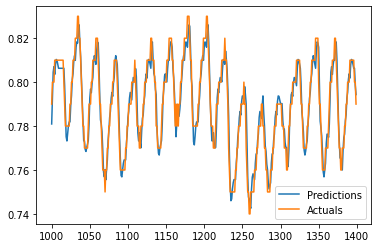

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

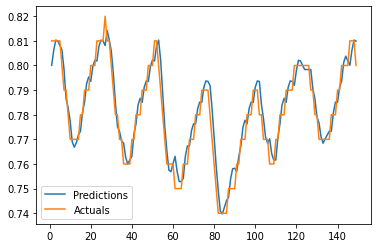

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:150], label='Predictions')
plt.plot(train_results['Actuals'][1:150], label='Actuals')
plt.legend()

In [15]:
keras.metrics.mean_absolute_error(y_train1, train_predictions).numpy()

0.0045606606

In [16]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,0.769279,0.77
1,0.768439,0.77
2,0.770240,0.77
3,0.771772,0.77
4,0.773327,0.78
...,...,...
245,0.770733,0.77
246,0.774830,0.77
247,0.776301,0.78
248,0.782479,0.79


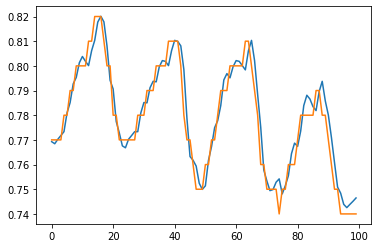

In [17]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [18]:
keras.metrics.mean_absolute_error(y_val1, val_predictions).numpy()

0.0047093546

In [19]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,0.796858,0.79
1,0.795146,0.80
2,0.799626,0.80
3,0.802132,0.80
4,0.801826,0.81
...,...,...
240,0.813772,0.81
241,0.811673,0.82
242,0.815943,0.82
243,0.818310,0.82


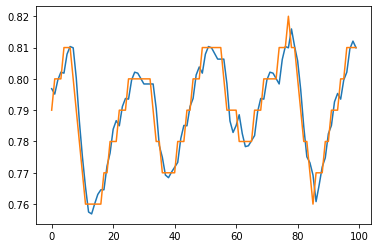

In [20]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [21]:
keras.metrics.mean_absolute_error(y_test1, test_predictions).numpy()

0.004287443